In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('test_orders_info.csv', delimiter=';')

In [49]:
data.head()

# Задание:  
# Дана выгрузка заказов с позициями. Определить товары-"якоря"(основные) и дополнительные товары(сопутствующие).   
# Формат результата:   
# - список основных и сопутствующих товаров по всей выборке;   
# - список основных и сопутствующих товаров по каждому городу.


,order_date,org,order_id,material,inv_qty,rev
0,20190801,1000,1009650752,3300030000,720.0,28080.00
1,20190801,1000,1009650752,7200859000,1.0,5037.00
2,20190801,1000,1009862550,7200859000,0.0,-2000.00
3,20190801,1000,1009924088,1500226000,864.0,165507.84
4,20190801,1000,1009924088,7200859000,2.0,24000.00


In [50]:
data['order_date'] = pd.to_datetime(data['order_date'], format='%Y%m%d')

In [51]:
data.head()

,order_date,org,order_id,material,inv_qty,rev
0,2019-08-01,1000,1009650752,3300030000,720.0,28080.00
1,2019-08-01,1000,1009650752,7200859000,1.0,5037.00
2,2019-08-01,1000,1009862550,7200859000,0.0,-2000.00
3,2019-08-01,1000,1009924088,1500226000,864.0,165507.84
4,2019-08-01,1000,1009924088,7200859000,2.0,24000.00


In [52]:
data.shape
# Итого более 6 миллион строк и 6 столбцов

(6051891, 6)

In [53]:
data.dtypes


order_date    datetime64[ns]
org                    int64
order_id               int64
material               int64
inv_qty              float64
rev                  float64
dtype: object

In [54]:
data.head()

,order_date,org,order_id,material,inv_qty,rev
0,2019-08-01,1000,1009650752,3300030000,720.0,28080.00
1,2019-08-01,1000,1009650752,7200859000,1.0,5037.00
2,2019-08-01,1000,1009862550,7200859000,0.0,-2000.00
3,2019-08-01,1000,1009924088,1500226000,864.0,165507.84
4,2019-08-01,1000,1009924088,7200859000,2.0,24000.00


In [144]:
data1 = data.groupby(['material'])['rev'].sum()
df_material_rev = pd.DataFrame(data1)
df_material_rev.reset_index(inplace=True)


In [145]:
df_material_rev.head()

,material,rev
0,20000,78.85
1,23000,1929.00
2,33000,3362370.91
3,34000,1033331.87
4,45000,445810.40


In [147]:
df_material_rev['part_%'] = (df_material_rev['rev']/df_material_rev['rev'].sum())*100
# part_% - доля от общей выручки для каждого товара

In [148]:
df_material_rev.head()


,material,rev,part_%
19138,7200859000,9.201600e+07,2.364122
711,200777000,6.478995e+07,1.664617
225,100596000,6.269456e+07,1.610781
3258,1100070000,3.568709e+07,0.916891
880,300313000,2.904796e+07,0.746315


In [150]:
df_material_rev = df_material_rev.sort_values(by='rev', ascending=False)
df_material_rev.head()
# Сортруем по выручке

,material,rev,part_%
19138,7200859000,9.201600e+07,2.364122
711,200777000,6.478995e+07,1.664617
225,100596000,6.269456e+07,1.610781
3258,1100070000,3.568709e+07,0.916891
880,300313000,2.904796e+07,0.746315


In [151]:
# Добавлю столбец с накопленной суммой процента выручки и построю график, с помошью которого определю, 
# в какой момент рост выручки замедляется.

df_material_rev['comsum'] = df_material_rev['part_%'].cumsum()
df_material_rev.head()

,material,rev,part_%,comsum
19138,7200859000,9.201600e+07,2.364122,2.364122
711,200777000,6.478995e+07,1.664617,4.028739
225,100596000,6.269456e+07,1.610781,5.639520
3258,1100070000,3.568709e+07,0.916891,6.556411
880,300313000,2.904796e+07,0.746315,7.302726


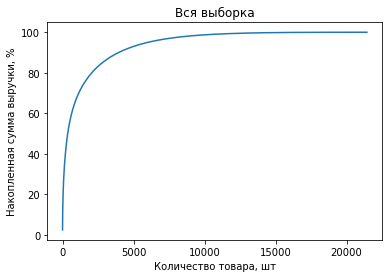

In [152]:
x = [i for i in range(len(df_material_rev))]
plt.plot(x, df_material_rev['comsum'])
plt.xlabel('Количество товара, шт')
plt.ylabel('Накопленная сумма выручки, %')
plt.title('Вся выборка')
plt.savefig('all.jpg')

# Увиденное на графике легко объяснить - относительно небольшое количество основных товаров вносят большой вклад в общую выручку,
# в то время как большинство товаров составляют оставшиеся 20% выручки.
# Видно, что % суммы выручки стремительно растет примерно до 80%, что соответствует порядка 2100 товарам.

In [62]:
firstn_all = df_material_rev.head(2100) 
lastn = df_material_rev.tail(19328) 
# 19328 полученио как общее число товаров минус количество основных товаров, то есть 21428 - 2100 = 19 328

In [63]:
firstn_all['part_%'].sum() # % выручки от основных товаров(первых 2100 товаров)

80.3093756806536

In [153]:
lastn['part_%'].sum() # % выручки от сопутствующих товаров(последних 19328 товаров)

19.690624319346387

In [65]:
# 2100 товаров-якорей, приносящих 80% всей выручки
main_all = pd.Series(firstn_all['material'])
main_all.head()

19138    7200859000
711       200777000
225       100596000
3258     1100070000
880       300313000
Name: material, dtype: int64

In [66]:
# Сопутствующие товары, приносящие 20% всей выручки
other_all = pd.Series(lastn['material'])
other_all.head()

5155     1900021000
6803     2800103000
13324    5000018001
2272      800814000
5055     1800562000
Name: material, dtype: int64

In [154]:
data2 = data[['material', 'rev', 'inv_qty']]
df_material_rev_qty = pd.DataFrame(data2)
df_material_rev_qty = df_material_rev_qty.groupby(['material'], as_index=False).sum(['rev', 'inv_qty'])
# Группировка по товару и подсчет количества едениц и выручки

In [159]:
df_material_rev_qty['price'] = df_material_rev_qty['rev']/df_material_rev_qty['inv_qty']
df_material_rev_qty.head()
# Добавим столбец с ценой

,material,rev,inv_qty,price,part_%
202,100503000,21.0,0.0,inf,5.395428e-07
12500,4600535001,160000.0,1.0,160000.0,4.110802e-03
12696,4700332000,146800.0,1.0,146800.0,3.771661e-03
10638,4200032000,284230.0,2.0,142115.0,7.302583e-03
10587,4100905000,519260.0,4.0,129815.0,1.334109e-02


In [156]:
df_material_rev_qty['part_%'] = (df_material_rev_qty['rev']/df_material_rev_qty['rev'].sum())*100
df_material_rev_qty = df_material_rev_qty.sort_values(by='price', ascending=False)

df_material_rev_qty['price'].describe()

# 75% ассортимента стоит менее 800 у.е.

count    2.142600e+04
mean              inf
std               NaN
min      0.000000e+00
25%      7.984209e+01
50%      2.480200e+02
75%      7.996506e+02
max               inf
Name: price, dtype: float64

In [157]:
a = df_material_rev_qty.head(2000)
a['price'].describe()

count    2.000000e+03
mean              inf
std               NaN
min      3.500000e+03
25%      4.769375e+03
50%      7.267654e+03
75%      1.311499e+04
max               inf
Name: price, dtype: float64

In [164]:
tmp = df_material_rev_qty.head(2000)
rev = tmp['part_%'].sum()
print(f'{rev} % выручки приносят 2000 самых дорогих товаров.')

# Первые 2000 самых дорогих товаров вносят всего 6.3% в общую выручку!
# Выявлено, что основную массу покупаемых товаров составляют недорогие единицы, которые приносят бОльшую часть выручки, 
# в то время как дорогие и очень дорогие товары вносят сравнительно небольшой процент в итоговую выручку.

6.346376718308564 % выручки приносят 2000 самых дорогих товаров.


In [72]:
data.head()

,order_date,org,order_id,material,inv_qty,rev
0,2019-08-01,1000,1009650752,3300030000,720.0,28080.00
1,2019-08-01,1000,1009650752,7200859000,1.0,5037.00
2,2019-08-01,1000,1009862550,7200859000,0.0,-2000.00
3,2019-08-01,1000,1009924088,1500226000,864.0,165507.84
4,2019-08-01,1000,1009924088,7200859000,2.0,24000.00


In [165]:
region_distribution = pd.DataFrame(data=data, columns=['org', 'material', 'inv_qty', 'rev'])
region_distribution.head()

region_distribution = region_distribution.groupby(['material', 'org'], as_index=False).sum(['rev', 'inv_qty'])

# Группируем по товару и региону, суммируем по количеству товара и прибыли


In [74]:
region_distribution.head()

,material,org,inv_qty,rev
0,20000,3000,1.0,78.85
1,23000,1000,7.0,1929.00
2,33000,1000,368.0,975469.46
3,33000,2000,373.0,1031293.13
4,33000,3000,248.0,650039.86


In [166]:
stat = region_distribution['org'].value_counts()
stat

# Посмотрим, сколько различных товаров купили в каждом городе


1000    16872
2000    11890
3000    11383
4001     7202
7000     3975
Name: org, dtype: int64

In [76]:
# Под кодом ИФНС = 1000 лежат данные по Республике Карелия

region_1000 = region_distribution.loc[region_distribution['org'] == 1000]
region_1000['part_%'] = (region_1000['rev']/region_1000['rev'].sum())*100
region_1000 = region_1000.sort_values(by='part_%', ascending=False)

# Выберем данные только с org = 1000, добавим столбец с долей выручки и отсортруем по нему.

<ipython-input-76-9919e78ff78d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_1000['part_%'] = (region_1000['rev']/region_1000['rev'].sum())*100


In [77]:
region_1000.head() 

,material,org,inv_qty,rev,part_%
1975,200777000,1000,184494.0,5.572187e+07,2.507546
46803,7200859000,1000,49249.0,4.915350e+07,2.211962
612,100596000,1000,84998.0,3.413431e+07,1.536082
2408,300313000,1000,15468.0,2.302227e+07,1.036028
9039,1100070000,1000,34852.0,1.948595e+07,0.876889


In [78]:
firstn_1000region = region_1000.head(2000)
firstn_1000region['part_%'].sum()

80.37078987227073

In [79]:
region_1000['comsum'] = region_1000['part_%'].cumsum()
region_1000.head()

,material,org,inv_qty,rev,part_%,comsum
1975,200777000,1000,184494.0,5.572187e+07,2.507546,2.507546
46803,7200859000,1000,49249.0,4.915350e+07,2.211962,4.719509
612,100596000,1000,84998.0,3.413431e+07,1.536082,6.255591
2408,300313000,1000,15468.0,2.302227e+07,1.036028,7.291618
9039,1100070000,1000,34852.0,1.948595e+07,0.876889,8.168508


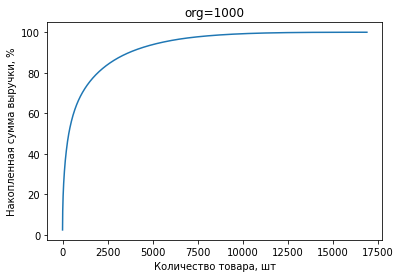

In [140]:
x = [i for i in range(len(region_1000))]
plt.plot(x, region_1000['comsum'])
plt.xlabel('Количество товара, шт')
plt.ylabel('Накопленная сумма выручки, %')
plt.title('org=1000')
plt.savefig('1000_cumsum.jpg')

# Видно, что % суммы выручки стремительно растет примерно до 80%, что соответствует порядка 2000 товаров.

In [81]:
main_1000region = pd.Series(firstn_1000region['material']) # Список основных товаров по региону 1000
main_1000region.head()

1975      200777000
46803    7200859000
612       100596000
2408      300313000
9039     1100070000
Name: material, dtype: int64

In [82]:
lastn_1000region = region_1000.tail(14872)
other_1000region = pd.Series(lastn_1000region['material']) # Список сопутствующих товаров по региону 1000
other_1000region.head()

26680    4200283000
5892      800645000
49023    8200172000
50983    9500301003
1223      200191000
Name: material, dtype: int64

In [83]:
# Под кодом ИФНС = 2000 лежат данные по Чеченской Республике

region_2000 = region_distribution.loc[region_distribution['org'] == 2000]
region_2000['part_%'] = (region_2000['rev']/region_2000['rev'].sum())*100
region_2000 = region_2000.sort_values(by='part_%', ascending=False)

<ipython-input-83-14aa1c50f4bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2000['part_%'] = (region_2000['rev']/region_2000['rev'].sum())*100


In [84]:
region_2000.head()

,material,org,inv_qty,rev,part_%
613,100596000,2000,42847.0,18240520.27,2.212935
46804,7200859000,2000,16926.0,15987434.05,1.939591
9040,1100070000,2000,18265.0,11030606.98,1.338230
1976,200777000,2000,26182.0,7895186.01,0.957842
41833,6200709000,2000,37262.0,7439890.41,0.902605


In [85]:
region_2000['comsum'] = region_2000['part_%'].cumsum()
region_2000.head()

,material,org,inv_qty,rev,part_%,comsum
613,100596000,2000,42847.0,18240520.27,2.212935,2.212935
46804,7200859000,2000,16926.0,15987434.05,1.939591,4.152526
9040,1100070000,2000,18265.0,11030606.98,1.338230,5.490756
1976,200777000,2000,26182.0,7895186.01,0.957842,6.448598
41833,6200709000,2000,37262.0,7439890.41,0.902605,7.351203


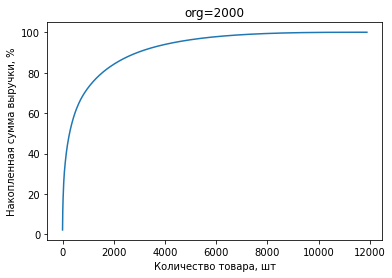

In [141]:
x = [i for i in range(len(region_2000))]
plt.plot(x, region_2000['comsum'])
plt.xlabel('Количество товара, шт')
plt.ylabel('Накопленная сумма выручки, %')
plt.title('org=2000')
plt.savefig('2000_cumsum.jpg')

# Видно, что % суммы выручки стремительно растет примерно до 80%, что соответствует порядка 1550 товаров.

In [87]:
firstn_2000region = region_2000.head(1550) 
firstn_2000region['part_%'].sum()

79.94609393589322

In [88]:
main_2000region = pd.Series(firstn_2000region['material']) # Список основных товаров по региону 2000
main_2000region.head()

613       100596000
46804    7200859000
9040     1100070000
1976      200777000
41833    6200709000
Name: material, dtype: int64

In [89]:
lastn_2000region = region_2000.tail(10340)
other_2000region = pd.Series(lastn_2000region['material']) # Список сопутствующих товаров по региону 2000
other_2000region.head()

27754    4300240000
23409    3800389000
1655      200492001
12057    1500374000
13247    1700782004
Name: material, dtype: int64

In [90]:
# Под кодом ИФНС = 1000 лежат данные по Астраханской области

region_3000 = region_distribution.loc[region_distribution['org'] == 3000]
region_3000['part_%'] = (region_3000['rev']/region_3000['rev'].sum())*100
region_3000 = region_3000.sort_values(by='part_%', ascending=False)


<ipython-input-90-850a024da178>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_3000['part_%'] = (region_3000['rev']/region_3000['rev'].sum())*100


In [91]:
region_3000.head()

,material,org,inv_qty,rev,part_%
46805,7200859000,3000,16843.0,17782538.30,3.164290
614,100596000,3000,24296.0,10175193.42,1.810611
3540,500581000,3000,16759.0,6579654.61,1.170808
15100,2100828000,3000,4720.0,5124780.47,0.911922
3660,500753000,3000,20663.0,4993657.41,0.888590


In [92]:
region_3000['comsum'] = region_3000['part_%'].cumsum()
region_3000.head()

,material,org,inv_qty,rev,part_%,comsum
46805,7200859000,3000,16843.0,17782538.30,3.164290,3.164290
614,100596000,3000,24296.0,10175193.42,1.810611,4.974902
3540,500581000,3000,16759.0,6579654.61,1.170808,6.145709
15100,2100828000,3000,4720.0,5124780.47,0.911922,7.057632
3660,500753000,3000,20663.0,4993657.41,0.888590,7.946221


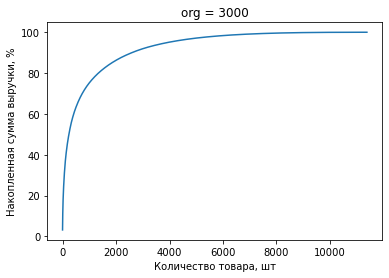

In [142]:
x = [i for i in range(len(region_3000))]
plt.plot(x, region_3000['comsum'])
plt.xlabel('Количество товара, шт')
plt.ylabel('Накопленная сумма выручки, %')
plt.title('org = 3000')
plt.savefig('3000_cumsum.jpg')

# Видно, что % суммы выручки стремительно растет примерно до 80%, что соответствует порядка 1350 товаров.

In [94]:
firstn_3000region = region_3000.head(1350) 
firstn_3000region['part_%'].sum()


80.0884302329733

In [95]:
main_3000region = pd.Series(firstn_3000region['material']) # Список основных товаров по региону 3000
main_3000region.head()

46805    7200859000
614       100596000
3540      500581000
15100    2100828000
3660      500753000
Name: material, dtype: int64

In [96]:
lastn_3000region = region_3000.tail(10033)
other_3000region = pd.Series(lastn_3000region['material']) # Список сопутствующих товаров по региону 3000
other_3000region.head()

42186    6300804000
4952      700403000
39676    5800718000
40562    5900870001
24229    4000312000
Name: material, dtype: int64

In [97]:
# Под кодом ИФНС = 4001 лежат данные по Калужской области

region_4001 = region_distribution.loc[region_distribution['org'] == 4001]
region_4001['part_%'] = (region_4001['rev']/region_4001['rev'].sum())*100
region_4001 = region_4001.sort_values(by='part_%', ascending=False)

<ipython-input-97-9d5009fde8ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_4001['part_%'] = (region_4001['rev']/region_4001['rev'].sum())*100


In [98]:
region_4001.head()

,material,org,inv_qty,rev,part_%
23263,3800046000,4001,10812.000,3103734.52,2.132934
22707,3600751001,4001,4278.082,3034643.62,2.085454
4454,600968000,4001,7941.000,2536920.47,1.743411
9042,1100070000,4001,3135.000,1652392.33,1.135550
3541,500581000,4001,4279.000,1627145.31,1.118199


In [99]:
region_4001['comsum'] = region_4001['part_%'].cumsum()
region_4001.head()

,material,org,inv_qty,rev,part_%,comsum
23263,3800046000,4001,10812.000,3103734.52,2.132934,2.132934
22707,3600751001,4001,4278.082,3034643.62,2.085454,4.218389
4454,600968000,4001,7941.000,2536920.47,1.743411,5.961800
9042,1100070000,4001,3135.000,1652392.33,1.135550,7.097349
3541,500581000,4001,4279.000,1627145.31,1.118199,8.215549


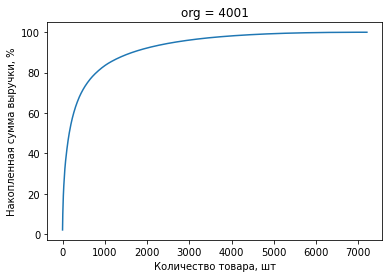

In [138]:
x = [i for i in range(len(region_4001))]
plt.plot(x, region_4001['comsum'])
plt.xlabel('Количество товара, шт')
plt.ylabel('Накопленная сумма выручки, %')
plt.title('org = 4001')
plt.savefig('4001_cumsum.jpg')

# Видно, что % суммы выручки стремительно растет примерно до 80%, что соответствует порядка 800 товарам.

In [101]:
firstn_4001region = region_4001.head(800) 
firstn_4001region['part_%'].sum()

80.0237618406292

In [102]:
main_4001region = pd.Series(firstn_4001region['material']) # Список основных товаров по региону 4001
main_4001region.head()

23263    3800046000
22707    3600751001
4454      600968000
9042     1100070000
3541      500581000
Name: material, dtype: int64

In [103]:
lastn_4001region = region_4001.tail(6402)
other_4001region = pd.Series(lastn_4001region['material']) # Список сопутствующих товаров по региону 4001
other_4001region.head()

8384     1000166000
6744      900309001
10544    1300443001
17451    2700864000
10415    1300173001
Name: material, dtype: int64

In [104]:
# Под кодом ИФНС = 7000 лежат данные по Томскй области

region_7000 = region_distribution.loc[region_distribution['org'] == 7000]
region_7000['part_%'] = (region_7000['rev']/region_7000['rev'].sum())*100
region_7000 = region_7000.sort_values(by='part_%', ascending=False)

<ipython-input-104-dded2047c007>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_7000['part_%'] = (region_7000['rev']/region_7000['rev'].sum())*100


In [105]:
region_7000.head()

,material,org,inv_qty,rev,part_%
46807,7200859000,7000,6846.0,7897109.93,5.711839
37305,5600429000,7000,14964.0,6029647.58,4.361137
32375,5000270001,7000,3002.0,3429671.81,2.480620
15102,2100828000,7000,1606.0,2465832.85,1.783493
32373,5000269001,7000,2210.0,2425081.99,1.754019


In [106]:
region_7000['comsum'] = region_7000['part_%'].cumsum()
region_7000.head()

,material,org,inv_qty,rev,part_%,comsum
46807,7200859000,7000,6846.0,7897109.93,5.711839,5.711839
37305,5600429000,7000,14964.0,6029647.58,4.361137,10.072975
32375,5000270001,7000,3002.0,3429671.81,2.480620,12.553596
15102,2100828000,7000,1606.0,2465832.85,1.783493,14.337089
32373,5000269001,7000,2210.0,2425081.99,1.754019,16.091107


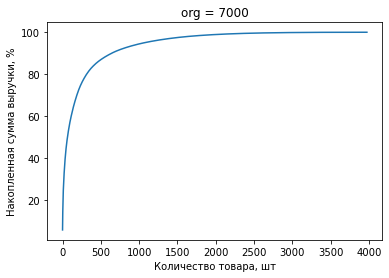

In [143]:
x = [i for i in range(len(region_7000))]
plt.plot(x, region_7000['comsum'])
plt.xlabel('Количество товара, шт')
plt.ylabel('Накопленная сумма выручки, %')
plt.title('org = 7000')
plt.savefig('7000_cumsum.jpg')

# Видно, что % суммы выручки стремительно растет примерно до 80%, что соответствует порядка 320 товарам.

In [108]:
firstn_7000region = region_7000.head(320) 
firstn_7000region['part_%'].sum()

80.25419931563181

In [137]:
main_7000region = pd.Series(firstn_7000region['material']) # Список основных товаров по региону 7000
main_7000region.head()

46807    7200859000
37305    5600429000
32375    5000270001
15102    2100828000
32373    5000269001
Name: material, dtype: int64

In [136]:
lastn_7000region = region_7000.tail(3656)
other_7000region = pd.Series(lastn_7000region['material']) # Список сопутствующих товаров по региону 7000
other_7000region.head()

50104    8800046000
48556    7900807003
5240      700706000
40846    6000137000
50846    9200771003
Name: material, dtype: int64